In [7]:
#!pip install netCDF4

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from netCDF4 import Dataset
import json
%matplotlib inline

In [128]:
def add(a, b):
    return np.abs(a) + np.abs(b)

def subtract(a, b):
    return np.abs(a) - np.abs(b)

In [2]:
# era_AREA = area_grid_cell(lat, 0.375, 0.375)

In [3]:
nc_path   = '//uio/lagringshotell/geofag/students/metos/hannasv/satelite_coordinates/'
#nc_path  = '//home/hanna/Desktop/examples_master_thesis/'
nc_file  = glob.glob(nc_path + '*.nc')[0]
rootgrp = Dataset(nc_file, "r", format="NETCDF4")
cloud_mask = rootgrp.variables["cloudMask"][:].data
lat_array = rootgrp.variables["lat"][:].data
lon_array = rootgrp.variables["lon"][:].data
lat_array[lat_array < -99] = np.nan # updates of disk values to nan
lon_array[lon_array < -99] = np.nan # updates of disk values to nan
#d_phi   = lon_array[:, 1:] - lon_array[:, :-1]
#d_theta = lat_array[1:, :] - lat_array[:-1, :]

# Padding the axis -- we removed by taking the difference
#pad     = np.ones((3712, 1))*np.nan # adding numpy to the axis the values
#d_phi   = np.concatenate((pad, d_phi), axis = 1)/2
#d_theta = np.concatenate((pad.transpose(), d_theta), axis = 0)/2

In [4]:
rootgrp

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    creator_name: EUMETSAT
    creator_url: http://archive.eumetsat.int
    creator_email: archive@eumetsat.int
    institution: EUMETSAT
    license: CopyRight EUMETSAT 2008
    Conventions: CF-1.0
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    title: EUMETSAT-ARCHIVE-CLOUD-MASK-NetCDF
    summary: NA
    keywords: EUMETSAT, ARCHIVE, NetCDF, CLOUD MASK
    history: EUMETSAT CopyRight 2008
    comment: DRAFT VERSION
    wmo_filename: W_XX-EUMETSAT-Darmstadt,SING+LEV+SAT,MSG4+CLM_C_EUMG_20190613053000.nc
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: 0.0
    GRIB_param_Nx: 3712
    GRIB_param_Ny: 3712
    GRIB_orgReferenceTime: 20190613053000
    time_coverage_start: 20190613053000
    time_coverage_end: 20190613053000
    source: /data/products/1338648/MSG4-SEVI-MSGCLMK-0100-0100-20190613053000.000000000Z-20190613054348-1338648.nc.tmp
    dimensions(

In [78]:
def area_grid_cell(c_lat, d_lat, d_lon):
        """
        c_lat : float
            Centre point longitude, latitude in degrees

        d_lat, d_lon : float
            delta lat lon in degrees

        Returns : area in km^2

        cdo : If the grid cell area have to be computed it is scaled with the earth radius to square meters.
        """
        R = 6371000  # in M
        # area er egentlig R**2
        area = R*(np.sin((c_lat + d_lat)*np.pi/180) - np.sin((c_lat - d_lat)*np.pi/180) )*(2*d_lon*np.pi/180) # R**2
        return area


In [158]:
def compute_dDegrees(lat, lon):
    """
    lat, lon shape is (3712, 3712).
    """
    
    assert lat.shape == lon.shape == (3712, 3712), 'Wrong shape of lat and lon expected (3712, 3712), got lat.shape {} and lon.shape {}'.format(lat.shape, lon.shape)
    
    d_phi_left      = np.nan*np.zeros(np.shape(lat))
    d_phi_right    = np.nan*np.zeros(np.shape(lat))

    d_theta_up    = np.nan*np.zeros(np.shape(lat))
    d_theta_down  = np.nan*np.zeros(np.shape(lat))
    
    #cell_areas = np.nan*np.zeros(np.shape(lat))
    
    for i in range(1500, len(lat)-1):
        for j in range(1500, len(lat)-1):
            # TODO check if you swappen up and down latitude.
            print(lon[i, j]   < lon[i, j+1]) # true 
            print(lat[i+1, j] > lat[i, j]) # true
            print(" ")
            #assert lon[i, j] < lon[i, j+1]
            d_phi_right[i,j]     = subtract(lon[i, j], lon[i, j+1])/2
            #assert lon[i, j-1] > lon[i, j]
            d_phi_left[i,j]      = subtract(lon[i, j-1], lon[i, j])/2                
            #print("left_half_dist {}, right _half_dist {}".format(left_half_dist, right_half_dist))
            #dlon               = (np.abs(left_half_dist) + np.abs(right_half_dist))/2
            #d_phi[i][j]        = dlon
            #assert lat[i+1, j] > lat[i, j]
            #assert lat[i-1, j] < lat[i, j]
            d_theta_up[i,j]    = subtract(lat[i+1, j], lat[i, j])/2
            d_theta_down[i,j]  = subtract(lat[i, j], lat[i-1, j])/2
            #print("upper_half_dist {}, lower_half_dist {}".format(upper_half_dist, lower_half_dist))
            #dlat               = (np.abs(upper_half_dist) + np.abs(lower_half_dist))/2
            #d_theta[i][j]      = dlat
            #cell_areas[i][j] = area_grid_cell(lat[i, j], dlat, dlon)       
            
    return d_phi_left,d_phi_right, d_theta_up,  d_theta_down #, cell_areas

In [159]:
d_phi_left, d_phi_right, d_theta_up,  d_theta_down = compute_dDegrees(lat_array, lon_array)

True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True
True
 
True

KeyboardInterrupt: 

In [157]:
areas = []
corner_mask = []
lats  = [33.75] #np.arange(30, 56, 0.75) #[33.75, 33.0, 38.25, 39, 39.75]#np.arange(30, 56, 5) 
lons  = [-13.5] #np.arange(-15, 33, 0.75) #[-13.5, -12.75, 13.5, 12.75, 21.75, 22.5, 28.5, 29.25, 21.5]#

c_lat = lat_array.reshape(-1)
c_lon = lon_array.reshape(-1)
d_theta_down = d_theta_down.reshape(-1)
d_phi_left = d_phi_left.reshape(-1)
d_theta_up = d_theta_up.reshape(-1)
d_phi_right = d_phi_right.reshape(-1)
cloud_mask_array = cloud_mask.reshape(-1) 

assert c_lon.shape == c_lat.shape == d_theta.shape == d_phi.shape == cloud_mask_array.shape, " c_lon.shape {},  c_lat.shape {},  d_theta.shape {}, d_phi.shape {} cloud_mask_array.shape {}".format(c_lon.shape,  c_lat.shape,  d_theta.shape, d_phi.shape, cloud_mask_array.shape) 

data = {}
for lat in lats:
    data[str(lat)] = {}
    for lon in lons:
        data[str(lat)][str(lon)] = {}
        era_AREA = area_grid_cell(lat, 0.375, 0.375)
        #print("lat = {}, lon ={} era_AREA {}".format(era_AREA, lat, lon))
        
        era_up    = lat + 0.375
        era_down  = lat - 0.375
        era_left  = lon - 0.375
        era_right = lon + 0.375

        # to ensure correct sign
        cmk_left  = c_lon - np.abs(d_phi_left)   #- era_right
        cmk_right = c_lon + np.abs(d_phi_right)   #- era_left

        # TODO : Sjekk d theta og lignende.
        cmk_down    = c_lat + np.abs(d_theta_up) #- era_down
        cmk_up  = c_lat - np.abs(d_theta_down) #- era_up

        data[str(lat)][str(lon)]['centre'] = {}
        data[str(lat)][str(lon)]['down'] = {}
        data[str(lat)][str(lon)]['up'] = {}
        data[str(lat)][str(lon)]['right'] = {}
        data[str(lat)][str(lon)]['left'] = {}
        data[str(lat)][str(lon)]['corner'] = {}

        idx_left_boundary  = np.intersect1d(np.argwhere(cmk_right > era_left),  np.argwhere(cmk_left < era_left) )
        idx_right_boundary = np.intersect1d(np.argwhere(cmk_right > era_right), np.argwhere(cmk_left < era_right) )
        idx_up_boundary    = np.intersect1d(np.argwhere(cmk_up > era_up),       np.argwhere(cmk_down < era_up) )
        idx_down_boundary  = np.intersect1d(np.argwhere(cmk_up > era_down),     np.argwhere(cmk_down < era_down) )

        data[str(lat)][str(lon)]['down']['index']  = idx_down_boundary.tolist()
        data[str(lat)][str(lon)]['up']['index']    = idx_up_boundary.tolist()
        data[str(lat)][str(lon)]['left']['index']  = idx_left_boundary.tolist()
        data[str(lat)][str(lon)]['right']['index'] = idx_right_boundary.tolist()

        idx_lower_right_corner = np.intersect1d(idx_down_boundary, idx_right_boundary)
        idx_lower_left_corner  = np.intersect1d(idx_down_boundary, idx_left_boundary)
        idx_upper_left_corner  = np.intersect1d(idx_up_boundary, idx_left_boundary)
        idx_upper_right_corner = np.intersect1d(idx_up_boundary, idx_right_boundary)

        if len(idx_lower_right_corner) > 1:
            print("idx_lower_right_corner")
            print(idx_lower_right_corner)
            corner_mask.append(0)
        
        if len(idx_lower_left_corner) > 1:
            print("idx_lower_left_corner")
            print(idx_lower_left_corner)
            corner_mask.append(1)
            
        if len(idx_upper_right_corner) > 1:
            print("idx_upper_right_corner")
            print(idx_lower_right_corner)
            corner_mask.append(2)
        
        if len(idx_upper_left_corner) > 1:
            print("idx_upper_left_corner")
            print(idx_upper_left_corner)
            corner_mask.append(3)
            
        corner_idx         = np.concatenate([idx_lower_right_corner, idx_lower_left_corner,
                                             idx_upper_left_corner, idx_upper_right_corner]) # corner idx
        
        if len(corner_idx) == 4:
            corner_mask.append(4)            
            
        data[str(lat)][str(lon)]['corner']['index'] = corner_idx.tolist()
        #assert len(corner_idx) == 4, "Not correct number of corners, nbr = {}.".format(len(corner_idx))

        if len(corner_idx) != 4:
            print("left bound {}".format(cmk_left[corner_idx]))
            print("right bound {}".format(cmk_right[corner_idx]))
            print("up bound {}".format(cmk_up[corner_idx]))
            print("down bound {}".format(cmk_down[corner_idx]))
        
        #plt.scatter(c_lon[corner_idx], c_lat[corner_idx])
        #plt.show()
        #lt.
            
            
     

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value enc

left bound []
right bound []
up bound []
down bound []


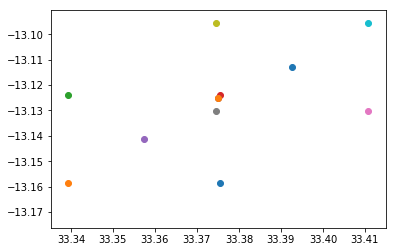

In [146]:
for index in idx_lower_right_corner:
    """ plot Index """
    plt.scatter(cmk_up[index],   cmk_left[index], 'blue')
    plt.scatter(cmk_down[index], cmk_left[index] )
    plt.scatter(cmk_down[index], cmk_right[index] )
    plt.scatter(cmk_up[index],   cmk_right[index] )
    plt.scatter(c_lat[index],    c_lon[index])
    """ plot Scatter era cell """
    plt.scatter(era_down,        era_right) 
    #plt.scatter(era_down,        era_left)
    #plt.scatter(era_up,          era_right)
    #plt.scatter(era_up,          era_left) 

In [ ]:
#areas

In [ ]:
#len(corner_mask)/64

In [126]:
#a = np.array(corner_mask)[:2240].reshape((len(lats), len(lons) ))

In [ ]:
#sns.heatmap(a)

In [ ]:
   # TODO add new centre corners. And calculate  
        llc_dlat = subtract(cmk_up[idx_lower_left_corner], era_down)/2
        llc_dlon = subtract(era_left, cmk_right[idx_lower_left_corner])/2
        llc_lat  = era_down + llc_dlat

        llc_area = area_grid_cell(llc_lat, llc_dlat, llc_dlon)
        #print("area lower left area {}".format(f/era_AREA))

        lrc_dlat = subtract(cmk_up[idx_lower_right_corner], era_down)/2
        lrc_dlon = subtract(cmk_left[idx_lower_right_corner], era_right)/2

        lrc_lat  = era_down + lrc_dlat
        lrc_area = area_grid_cell(lrc_lat, lrc_dlat, lrc_dlon)
        #print("area lower right area {}".format(h/era_AREA))

        ulc_dlat = subtract(era_up, cmk_down[idx_upper_left_corner])/2
        ulc_dlon = subtract(era_left, cmk_right[idx_upper_left_corner])/2
        ulc_lat = era_up - ulc_dlat
        ulc_area = area_grid_cell(ulc_lat, ulc_dlat, ulc_dlon)
        #print("area upper left area {}".format(i/era_AREA))

        urc_dlat = subtract(era_up, cmk_down[idx_upper_right_corner])/2
        urc_dlon = subtract(cmk_left[idx_upper_right_corner], era_right)/2
        urc_lat  = era_up - ulc_dlat
        urc_area = area_grid_cell(urc_lat, urc_dlat, urc_dlon)
        #print("area upper right area {}".format(j/era_AREA))
        #print("SUM corners {}".format((i+j+h+f)/era_AREA))

        corner_areas = np.array([lrc_area, llc_area, ulc_area, urc_area])
        data[str(lat)][str(lon)]['corner']['area'] = corner_areas.tolist()

        if len(corner_idx) == 0:
            raise ValueError('No corners found, something is wrong ... ')

        #assert len(corner_idx) == 4, "Expected four corners, got {}".format(len(corner_idx))

        #max_lon, min_lon = np.max(c_lon[corner_idx]), np.min(c_lon[corner_idx])
        #max_lat, min_lat = np.max(c_lat[corner_idx]), np.min(c_lat[corner_idx])

        # removes corners
        for idx in corner_idx:
            idx_down_boundary = idx_down_boundary[idx_down_boundary != idx]
            idx_up_boundary = idx_up_boundary[idx_up_boundary != idx]
            idx_left_boundary = idx_left_boundary[idx_left_boundary != idx]
            idx_right_boundary = idx_right_boundary[idx_right_boundary != idx]

        #idx_down_boundary = idx_down_boundary[idx_down_boundary != lower_right_corner]
        #idx_down_boundary = idx_down_boundary[idx_down_boundary != lower_left_corner]

        #idx_up_boundary = idx_up_boundary[idx_up_boundary != upper_right_corner]
        #idx_up_boundary = idx_up_boundary[idx_up_boundary != upper_left_corner]

        #idx_left_boundary = idx_left_boundary[idx_left_boundary != upper_left_corner]
        #idx_left_boundary = idx_left_boundary[idx_left_boundary != lower_left_corner]

        #idx_right_boundary = idx_right_boundary[idx_right_boundary != upper_right_corner]
        #idx_right_boundary = idx_right_boundary[idx_right_boundary != lower_right_corner]

        # subsection left boundary OLD
        low_bound = np.argwhere(cmk_down[idx_left_boundary] < era_up)
        up_bound  = np.argwhere(cmk_up[idx_left_boundary]   > era_down)
        sub_section_left = np.intersect1d(low_bound, up_bound)

        data[str(lat)][str(lon)]['left']['index_subset'] = sub_section_left.tolist()

        # subsection right boundary
        low_bound = np.argwhere( cmk_down[idx_right_boundary] < era_up )
        up_bound  = np.argwhere( cmk_up[idx_right_boundary]   > era_down)
        sub_section_right = np.intersect1d(low_bound, up_bound)
        data[str(lat)][str(lon)]['right']['index_right'] = sub_section_right.tolist()

        # Subsection Down Boundary
        #one = np.argwhere(cmk_left[idx_down_boundary]  > era_left)
        #two = np.argwhere(cmk_right[idx_down_boundary] < era_right)

        one = np.argwhere(cmk_right[idx_down_boundary]  > era_left)
        two = np.argwhere(cmk_left[idx_down_boundary]   < era_right)
        sub_section_down = np.intersect1d(one, two)
        data[str(lat)][str(lon)]['down']['index_subset'] = sub_section_down.tolist()

        # subsection up boundary
        one = np.argwhere( cmk_right[idx_up_boundary]  > era_left)
        two = np.argwhere( cmk_left[idx_up_boundary] < era_right)
        sub_section_up = np.intersect1d(one, two)
        data[str(lat)][str(lon)]['up']['index_subset'] = sub_section_up.tolist()
        #plt.scatter(cmk_left[corner_idx], cmk_up[corner_idx],        marker = 'v')
        #plt.scatter(cmk_left[idx_left_boundary][sub_section_left],   cmk_up[idx_left_boundary][sub_section_left])
        #plt.scatter(cmk_left[idx_right_boundary][sub_section_right], cmk_up[idx_right_boundary][sub_section_right])
        #plt.scatter(cmk_left[idx_up_boundary][sub_section_up],       cmk_up[idx_up_boundary][sub_section_up])
        #plt.scatter(cmk_left[idx_down_boundary][sub_section_down],   cmk_up[idx_down_boundary][sub_section_down])
        #plt.show()

        # test that these are empty
        t1 = np.intersect1d(idx_down_boundary, idx_up_boundary)
        t2 = np.intersect1d(idx_right_boundary, idx_left_boundary)
        assert len(t1) == len(t2) == 0, "intercept up down  {}, intersect left right {}.".format(t1, t2)

        # Calculate Boundaries

        # AREA left boundary
        dlon_lf = subtract(cmk_right[idx_left_boundary][sub_section_left], era_left)/2 
        dlat_lf = d_theta[idx_left_boundary][sub_section_left]
        lat_lf  = c_lat[idx_left_boundary][sub_section_left]
        #lon_lf  = c_lon[idx_left_boundary][sub_section_left]
        left_areas = area_grid_cell(lat_lf, dlat_lf, np.abs(dlon_lf))
        data[str(lat)][str(lon)]['left']['area'] = left_areas.tolist()

        a = np.sum(left_areas)

        fraction_left = (cloud_mask_array[idx_left_boundary][sub_section_left]*area_grid_cell(lat_lf,
                                                                                              dlat_lf,
                                                                                              dlon_lf)/era_AREA).sum()
        # AREA right boundary
        dlon_rb = subtract(era_right, cmk_left[idx_right_boundary][sub_section_right])/2
        dlat_rb = d_theta[idx_right_boundary][sub_section_right]
        lat_rb  = c_lat[idx_right_boundary][sub_section_right]
        #lon_rb = c_lon[idx_right_boundary][sub_section_right]
        right_area = area_grid_cell(lat_rb, dlat_rb, np.abs(dlon_rb)) 
        data[str(lat)][str(lon)]['right']['area'] = right_area.tolist()
        b = np.sum(right_area)

        fraction_right = (cloud_mask_array[idx_right_boundary][sub_section_right]*area_grid_cell(lat_rb,
                                                                                                 dlat_rb,
                                                                                                 dlon_rb)/era_AREA).sum()

        # AREA down boundary
        dlat_down = subtract(era_down, cmk_up[idx_down_boundary][sub_section_down])/2
        lat_down = era_down + dlat_down
        dlon_down = d_phi[idx_down_boundary][sub_section_down]
        #lon_down =  c_lon[idx_down_boundary][sub_section_down]
        down_area = area_grid_cell(lat_down, dlat_down, dlon_down)
        c = np.sum(down_area)
        data[str(lat)][str(lon)]['down']['area'] = down_area.tolist()
        fraction_down = (cloud_mask_array[idx_down_boundary][sub_section_down]*area_grid_cell(lat_down,
                                                                                              dlat_down,
                                                                                              dlon_down)/era_AREA).sum()
        # AREA up
        dlat_up = subtract(era_up, cmk_down[idx_up_boundary][sub_section_up])/2
        lat_up = era_up - dlat_up
        #lon_up = c_lon[idx_up_boundary][sub_section_up]
        dlon_up = d_phi[idx_up_boundary][sub_section_up]
        up_area = area_grid_cell(lat_up, dlat_up, np.abs(dlon_up))
        data[str(lat)][str(lon)]['up']['area'] = up_area.tolist()
        
        d = np.sum(up_area)

        fraction_up = (cloud_mask_array[idx_up_boundary][sub_section_up]*area_grid_cell(lat_up,
                                                                                         dlat_up,
                                                                                         dlon_up)/era_AREA).sum()
        # Index centres. Can safly assume centre cells are correct.
        idx_centre_one = np.intersect1d(np.argwhere(cmk_left  > era_left),
                                        np.argwhere(cmk_right < era_right))
        
        idx_centre_two = np.intersect1d(np.argwhere(cmk_up   < era_up),
                                        np.argwhere(cmk_down >  era_down))

        idx_centre_cells = np.intersect1d( idx_centre_one, idx_centre_two )
        data[str(lat)][str(lon)]['centre']['index'] = idx_centre_cells.tolist()

        lat_centre_cells = c_lat[idx_centre_cells]
        dlat_centre      = d_theta[idx_centre_cells]
        dlon_centre      = d_phi[idx_centre_cells]
        centre_area      = area_grid_cell(lat_centre_cells, dlat_centre, dlon_centre)

        data[str(lat)][str(lon)]['centre']['area'] = centre_area.tolist()
        
        #plt.scatter(cmk_left[idx_centre_cells], cmk_up[idx_centre_cells])
        #plt.scatter([lon+.375, lon-.375, lon+.375, lon-.375,], [lat+.375, lat+.375, lat-.375,lat-.375])
        #plt.show()

        fraction_centre  = (cloud_mask_array[idx_centre_cells]*centre_area/era_AREA).sum()
        
        #print("era_AREA {}".format(era_AREA))
        #print("Sum up {}".format(area_grid_cell(lat_up, dlat_up, dlon_up).sum()/era_AREA))
        #print("Sum down {}".format(area_grid_cell(lat_down, dlat_down, dlon_down).sum()/era_AREA))
        #print("Sum centre {}".format(area_grid_cell(lat_centre_cells, dlat_centre, dlon_centre).sum() /era_AREA))
        #print("Sum left {}".format(area_grid_cell(lat_lf, dlat_lf, dlon_lf).sum()/era_AREA))
        #print("Sum right {}".format(area_grid_cell(lat_rb, dlat_rb, dlon_rb).sum()/era_AREA))

        Test_weight = (area_grid_cell(lat_up, dlat_up, dlon_up).sum() +
                       area_grid_cell(lat_centre_cells, dlat_centre, dlon_centre).sum() +
                       area_grid_cell(lat_down, dlat_down, dlon_down).sum() +
                       area_grid_cell(lat_rb, dlat_rb, dlon_rb).sum() +
                       area_grid_cell(lat_lf, dlat_lf, dlon_lf).sum() )/era_AREA + (corner_areas.sum())/era_AREA
        
        areas.append(Test_weight)
        #print("area fraction {}".format(Test_weight))


In [112]:
35*64

2240

In [114]:
2253/64, 2253/35

(35, 64)

In [106]:
np.array(corner_mask).reshape(len(lats), len(lons))

ValueError: cannot reshape array of size 2253 into shape (35,64)

In [105]:
#fig, ax = plt.subplots(111)
#fig.set_size_inches(11,8)

ax = sns.heatmap(np.array(corner_mask).reshape(len(lats), len(lons)), annot = True, fmt='.3f', cmap = 'bwr')

ax.invert_yaxis()
#ax.set_xticklabels(lons);
#ax.set_yticklabels(lats);

ValueError: cannot reshape array of size 2253 into shape (35,64)

In [38]:
Test_weight

1.0048204157112952

In [39]:
corner_areas

array([[0.86575007],
       [0.5810131 ],
       [1.18697162],
       [0.27826687]])

In [36]:
#data

In [27]:
with open(nc_path + 'index_area.json', 'w') as f:
    json.dump(data, f)

In [29]:
from json import load
with open(nc_path + 'index_area.json', 'r') as f:
    data = load(f)

In [34]:
#data['30']['-15']['centre'].keys()

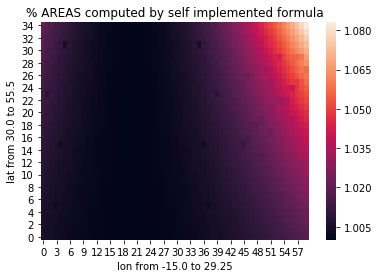

In [36]:
ax = sns.heatmap((np.array(areas)).reshape(len(lats), len(lons)))
ax.invert_yaxis()
ax.set_xlabel("lon from {} to {}".format(min(lons), max(lons)))
ax.set_ylabel("lat from {} to {}".format(min(lats), max(lats)))
#ax.yticklabels(visible = False);
#ax.set_xticklabels(lons);
ax.set_title("% AREAS computed by self implemented formula")
#plt.savefig('test_areas.png')